In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [4]:
@staticmethod
def factor(df):
    '''衡量当前相对位置高低的过滤器'''
    up = df['high'].rolling(20).max()
    down = df['low'].rolling(20).min()
    price_position = (df['close'] - down) / (up - down)
    return price_position

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.012799
   Rank_IC (Spearman): -0.028302
📊 信息比率:
   IR: -0.573321
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 131016
   因子列: factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


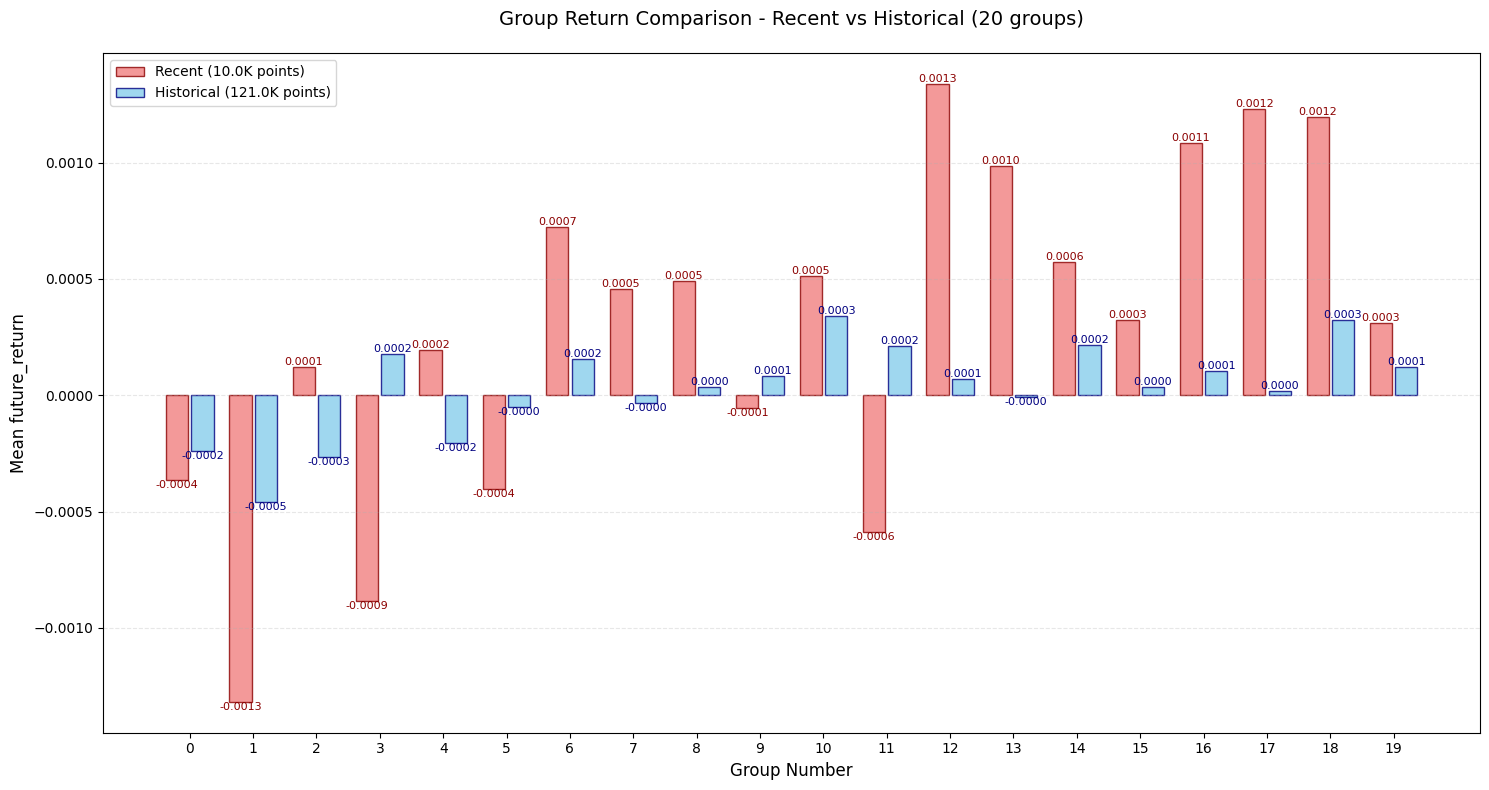

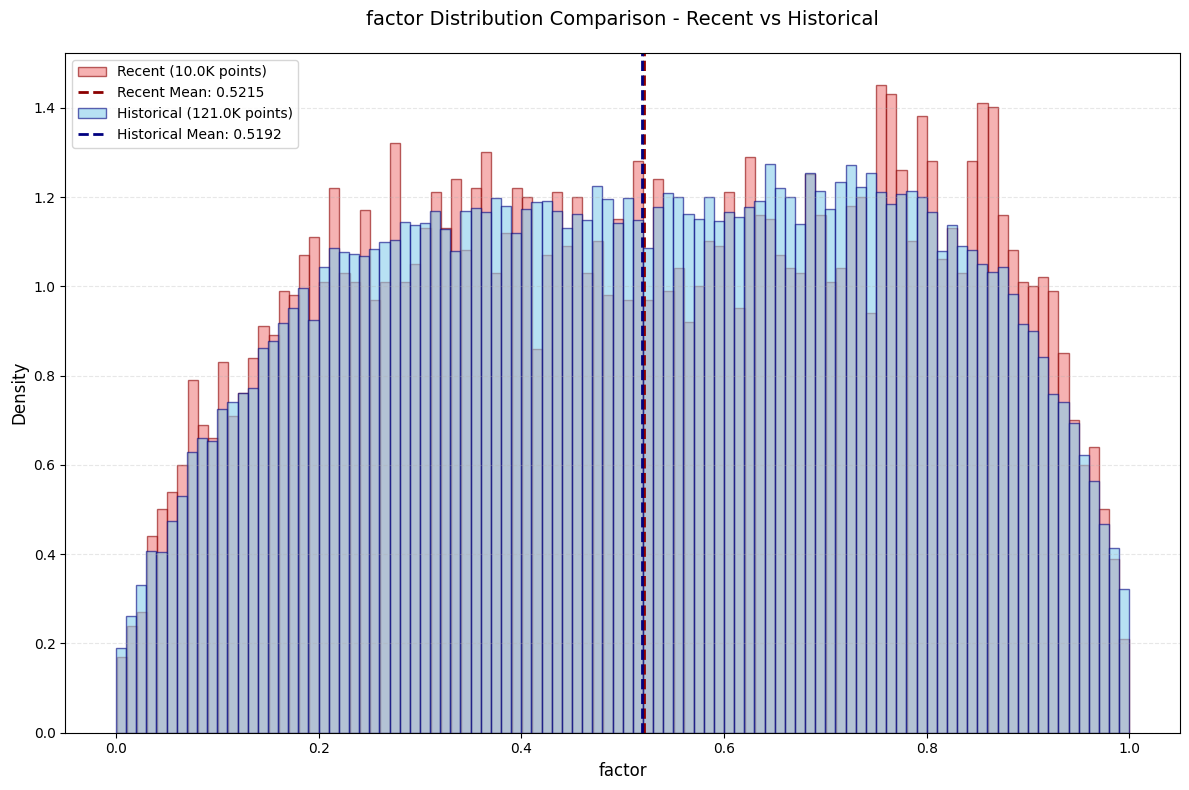

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [5]:
evaluator.set_factor(
    factor_func=factor,
    factor_name='factor'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

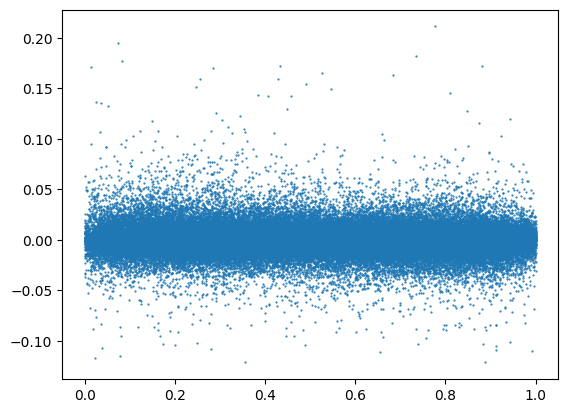

In [6]:
import matplotlib.pyplot as plt
plt.scatter(factor(df),df['close'].pct_change(-10), s=0.3)

In [7]:
result['information_ratio']['group_correlations']
# 这表示不同分组之间的相关性，通常用于评估因子在不同市场状态下的表现一致性。
# 如果相关性较高，说明因子在不同市场状态下表现一致；如果相关性较低，说明因子在不同市场状态下表现差异较大。

[-0.01740520037908764,
 0.012882002792512325,
 0.00014417157796242042,
 -0.00905412055290869,
 -0.008618382508941298,
 -0.0022004421599795053,
 -0.0019002590245796444,
 -0.00995554305169806,
 -0.003471354748250336,
 -0.003747487508887984]

In [8]:
print(result)

{'correlation_analysis': {'IC': 0.012798884521517194, 'Rank_IC': -0.028301500497265795}, 'information_ratio': {'IR': -0.5733213154169213, 'group_correlations': [-0.01740520037908764, 0.012882002792512325, 0.00014417157796242042, -0.00905412055290869, -0.008618382508941298, -0.0022004421599795053, -0.0019002590245796444, -0.00995554305169806, -0.003471354748250336, -0.003747487508887984], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0       0.0000   0.1058    0.0637      -0.0002      0.0148   6551
1       0.1059   0.1673    0.1381      -0.0005      0.0132   6551
2       0.1673   0.2173    0.1930      -0.0002      0.0126   6551
3       0.2173   0.2640    0.2407       0.0001      0.0121   6551
4       0.2640   0.3084    0.2863      -0.0002      0.0123   6550
5       0.3084   0.3523    0.3302      -0.0000      0.0115   6551
6       0.3523   0.3948    0.3